In [146]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

id: Уникальный идентификатор для каждого участника или наблюдения.

gender: Пол участника. Обычно это "Male" (мужчина), "Female" (женщина) или иногда "Other".

age: Возраст участника в годах.

hypertension: Индикатор наличия у участника гипертонии (высокого кровяного давления). Обычно это бинарный признак, где 1 означает наличие гипертонии, а 0 - её отсутствие.

heart_disease: Индикатор наличия у участника сердечных заболеваний. Аналогично, 1 означает наличие заболевания, а 0 - его отсутствие.

ever_married: Индикатор того, был ли участник когда-либо женат/замужем. Обычно это "Yes" (да) или "No" (нет).

work_type: Тип занятости участника. Это может быть "Private" (частный сектор), "Self-employed" (самозанятый), "Govt_job" (государственная служба), "children" (дети) или "Never_worked" (никогда не работал).

Residence_type: Тип места жительства участника. Обычно это "Urban" (городской) или "Rural" (сельский).

avg_glucose_level: Средний уровень глюкозы в крови участника.

bmi: Индекс массы тела участника./

In [147]:
DATA_URL = "https://raw.githubusercontent.com/enpure/kaggle--Binary-Classification-with-a-Tabular-Stroke-Prediction-Dataset/main/"
df = pd.read_csv(DATA_URL + "train.csv", index_col='id')
display(df.shape)
df.head()

(15304, 11)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


# EDA

In [148]:
X = df.copy()

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.4+ MB


<Axes: >

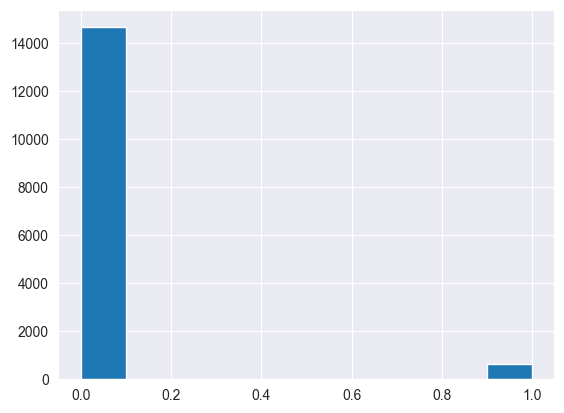

In [150]:
df['stroke'].hist()

In [151]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


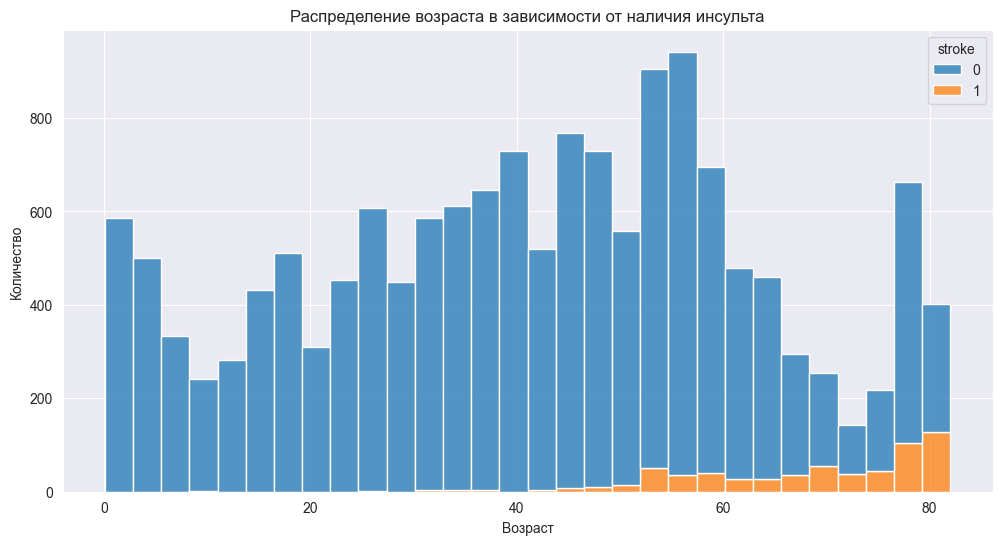

In [152]:
# Создание гистограммы
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='stroke', multiple='stack', bins=30, stat='count')
plt.title('Распределение возраста в зависимости от наличия инсульта')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

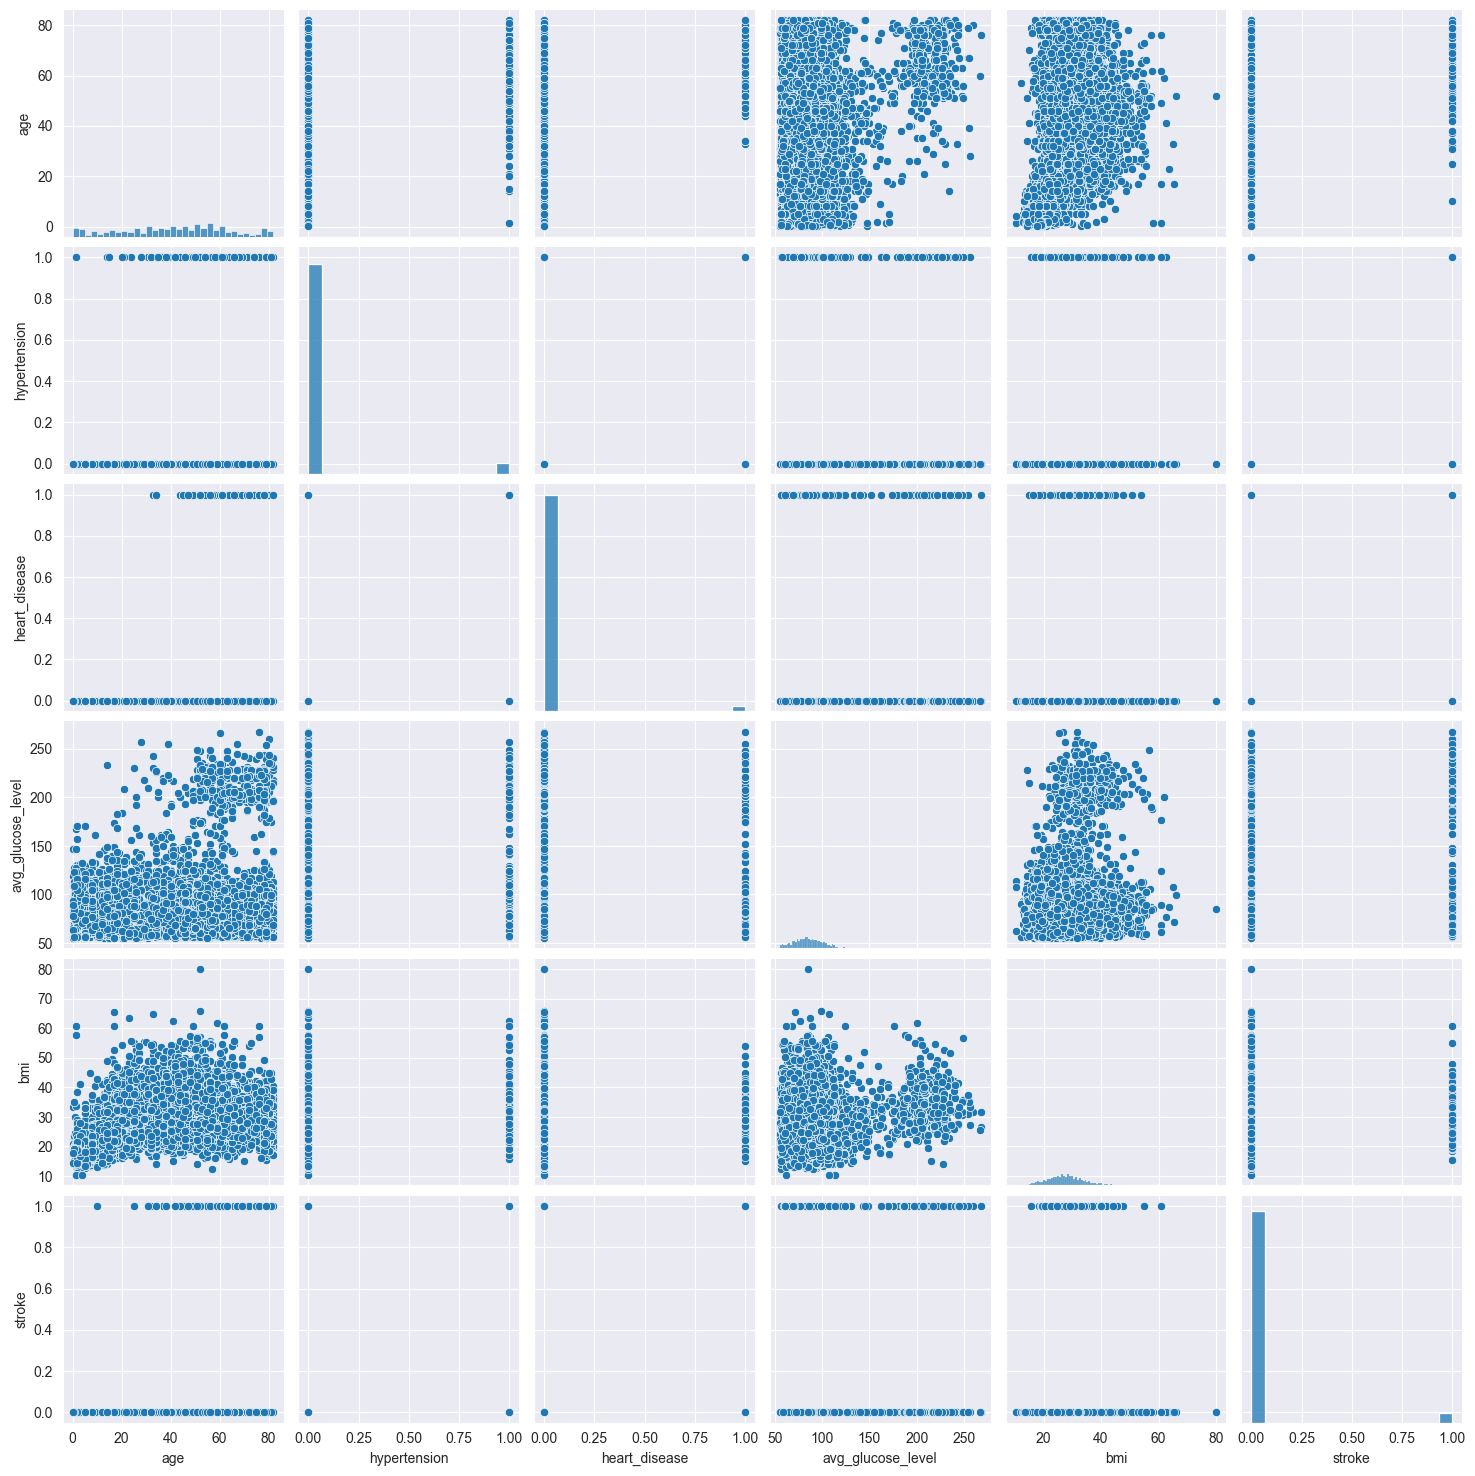

In [153]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df
);

## Диаграммы распределения признака к таргету

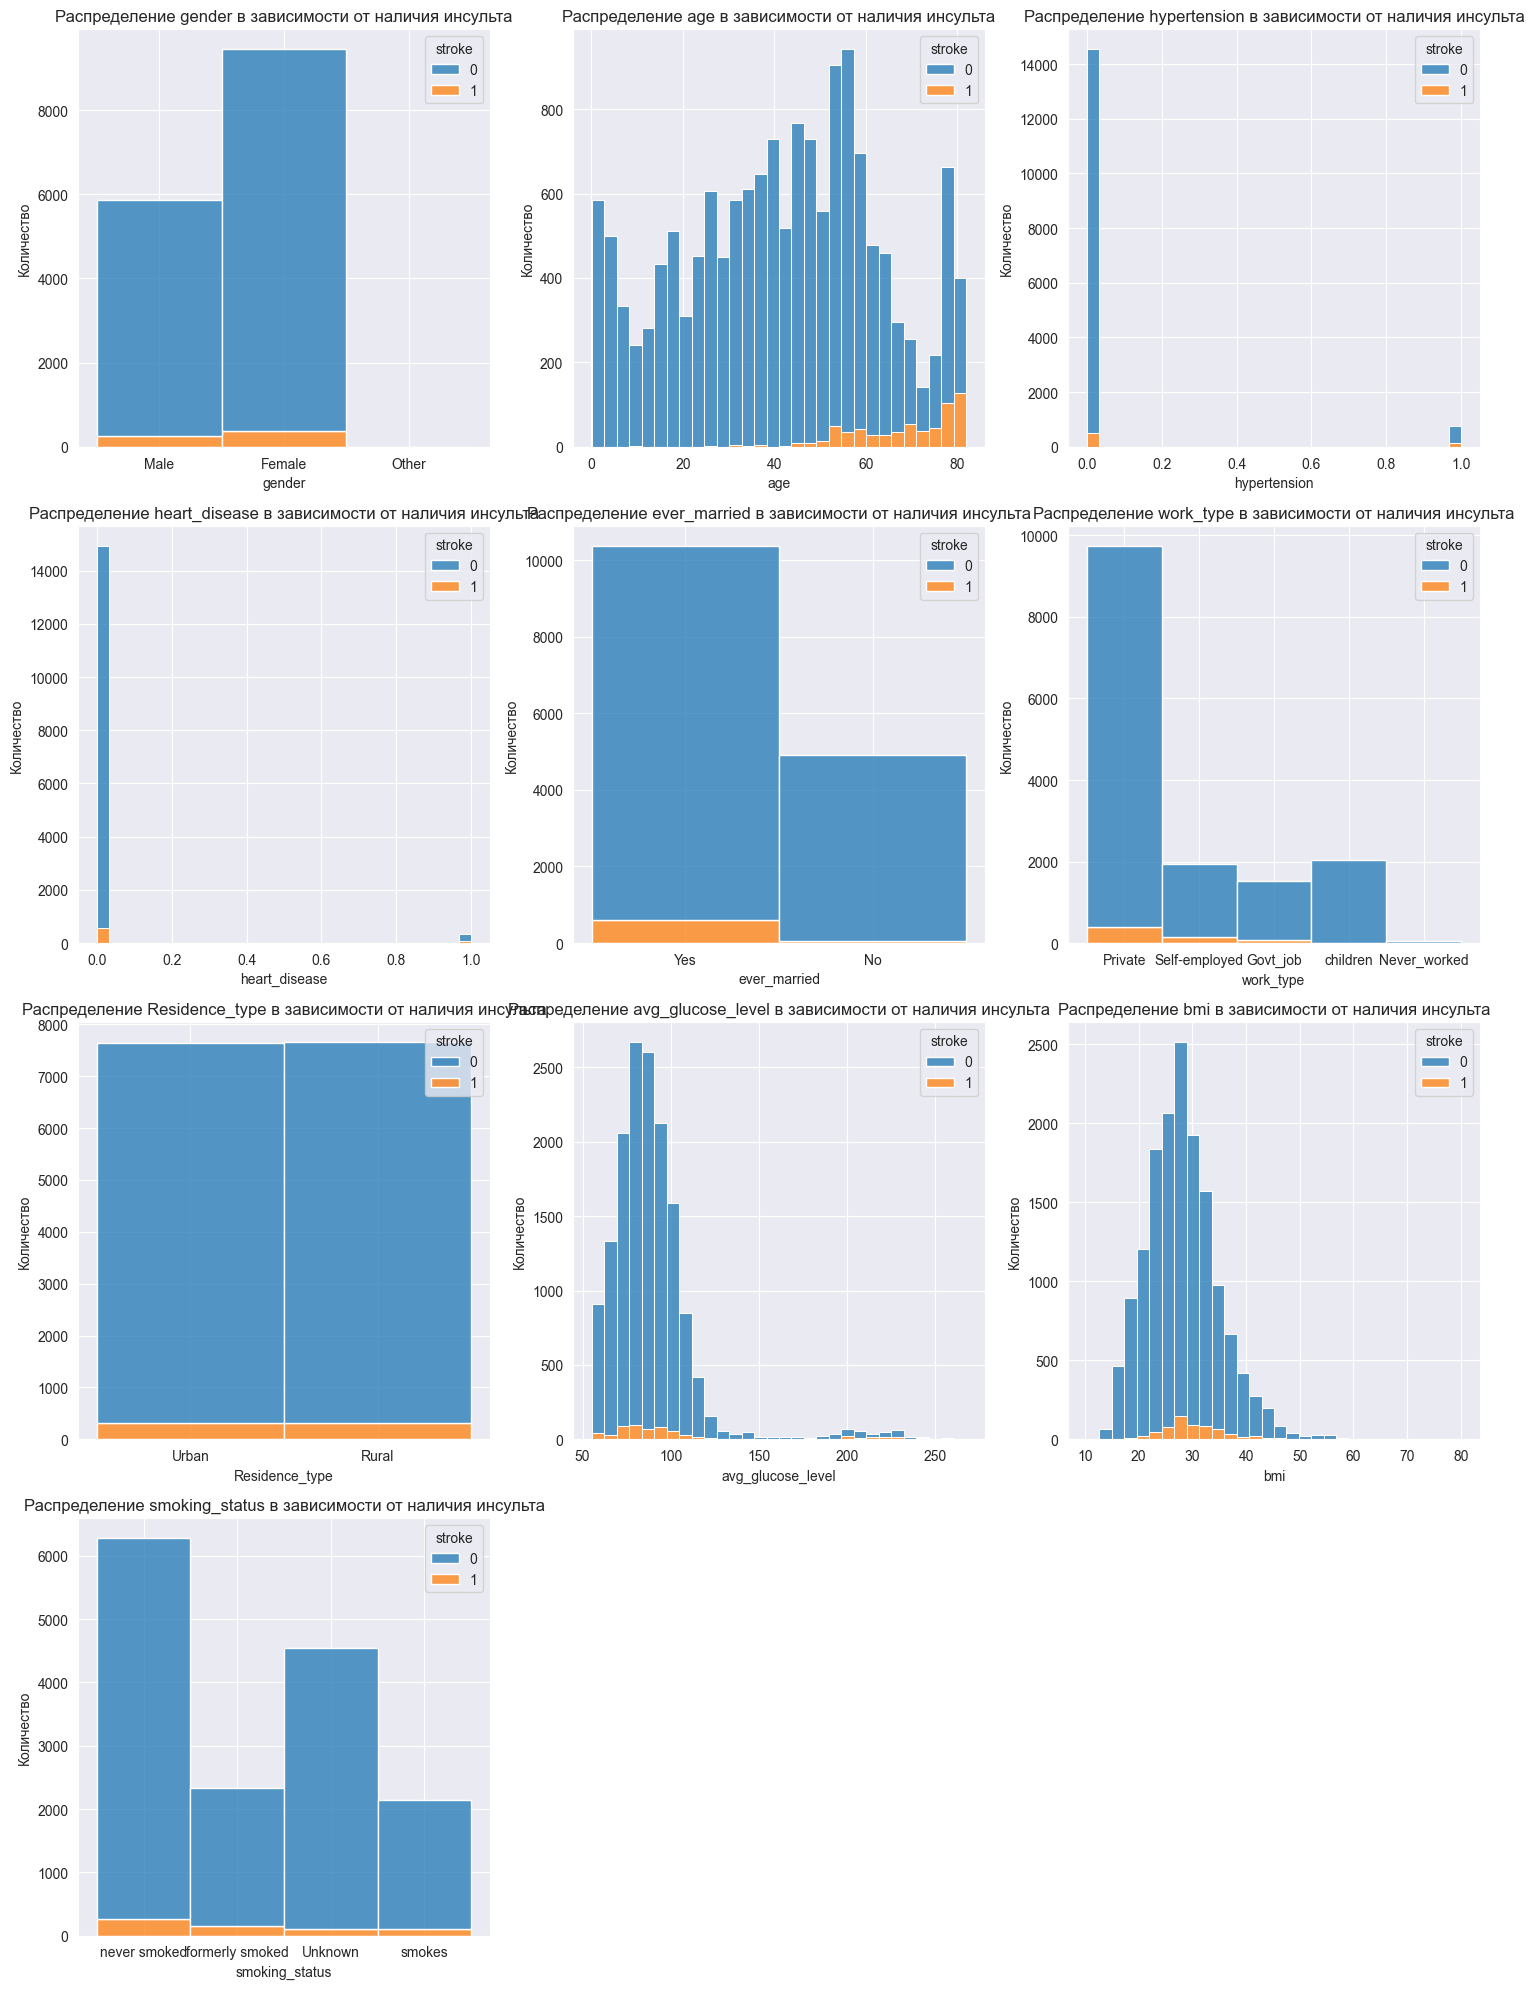

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Определение числа строк и столбцов для сетки графиков
n_cols = 3
n_rows = (len(df.columns) - 1) // n_cols + 1

# Создание фигуры с несколькими подграфиками
plt.figure(figsize=(15, 5 * n_rows))

for i, column in enumerate(df.columns[:-1]):  # Исключаем последний столбец, так как это целевой столбец 'stroke'
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df, x=column, hue='stroke', multiple='stack', bins=30, stat='count')
    plt.title(f'Распределение {column} в зависимости от наличия инсульта')
    plt.xlabel(column)
    plt.ylabel('Количество')

# Автоматическая корректировка расстояния между графиками
plt.tight_layout()
plt.show()

# Предобработка данных

## Преобразовываем категориальные признаки 

Удаляем строку в поле с Other тк это значение всего одно (и класс у него 0)

In [155]:
# Преобразуем категориальный признак gender через get_dummy
X = pd.get_dummies(X, columns=['gender'])

# преобразуем из булевого в числовой формат, хотя это не обязательно, можно обучать и с булевыми признаками
X['gender_Male'] = X['gender_Male'].astype(int)
X['gender_Female'] = X['gender_Female'].astype(int)
X['gender_Other'] = X['gender_Other'].astype(int)

In [157]:
X['ever_married'] = X['ever_married'].map({'Yes':1, 'No':0})

In [158]:
X['Residence_type'] = X['Residence_type'].map({'Urban':1, 'Rural':0})

In [159]:
# Преобразуем категориальный признак work_type через get_dummy
X = pd.get_dummies(X, columns=['work_type'])

# преобразуем из булевого в числовой формат, хотя это не обязательно, можно обучать и с булевыми признаками
X['work_type_Private'] = X['work_type_Private'].astype(int)
X['work_type_children'] = X['work_type_children'].astype(int)
X['work_type_Self-employed'] = X['work_type_Self-employed'].astype(int)
X['work_type_Govt_job'] = X['work_type_Govt_job'].astype(int)
X['work_type_Never_worked'] = X['work_type_Never_worked'].astype(int)

In [160]:
X['smoking_status'].value_counts()

smoking_status
never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: count, dtype: int64

In [161]:
# Преобразуем категориальный признак smoking_status через get_dummies
X = pd.get_dummies(X, columns=['smoking_status'])

# Преобразуем из булевого в числовой формат, хотя это не обязательно, можно обучать и с булевыми признаками
X['smoking_status_never smoked'] = X['smoking_status_never smoked'].astype(int)
X['smoking_status_Unknown'] = X['smoking_status_Unknown'].astype(int)
X['smoking_status_formerly smoked'] = X['smoking_status_formerly smoked'].astype(int)
X['smoking_status_smokes'] = X['smoking_status_smokes'].astype(int)

In [162]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15304 entries, 0 to 15303
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             15304 non-null  float64
 1   hypertension                    15304 non-null  int64  
 2   heart_disease                   15304 non-null  int64  
 3   ever_married                    15304 non-null  int64  
 4   Residence_type                  15304 non-null  int64  
 5   avg_glucose_level               15304 non-null  float64
 6   bmi                             15304 non-null  float64
 7   stroke                          15304 non-null  int64  
 8   gender_Female                   15304 non-null  int32  
 9   gender_Male                     15304 non-null  int32  
 10  gender_Other                    15304 non-null  int32  
 11  work_type_Govt_job              15304 non-null  int32  
 12  work_type_Never_worked          15304

In [163]:
# Этот код проверит наличие дубликатов во всем датафрейме
X.duplicated().sum()

0

In [164]:
X.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

## Создание новых признаков

In [ ]:
# # Создание нового столбца с диапазонами возраста
# bins = [0, 20, 40, 60, 80, 100]
# labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
# df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
# 
# # Построение графика с новым столбцом
# plt.figure(figsize=(10, 6))
# sns.countplot(x="age_group", hue="stroke", data=df)
# plt.title('Распределение возрастных групп в зависимости от наличия инсульта')
# plt.xlabel('Возрастная группа')
# plt.ylabel('Количество')
# plt.show()

## Разделим X и y

In [165]:
y = X['stroke']
X = X.drop('stroke', axis=1)

In [166]:
from sklearn.preprocessing import StandardScaler

# масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Преобразование обратно в датафрейм с сохранением имен столбцов
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [167]:
X_scaled

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-0.625710,-0.228752,-0.154546,0.688232,1.001569,-0.373297,0.444397,-1.269841,1.270016,-0.008084,-0.333648,-0.052459,0.754532,-0.380894,-0.391951,-0.649748,-0.424531,1.198564,-0.403521
1,-0.392544,-0.228752,-0.154546,0.688232,-0.998433,-0.416084,-0.626698,-1.269841,1.270016,-0.008084,-0.333648,-0.052459,0.754532,-0.380894,-0.391951,-0.649748,2.355540,-0.834332,-0.403521
2,0.027154,-0.228752,-0.154546,0.688232,-0.998433,0.547988,1.813018,0.787500,-0.787391,-0.008084,-0.333648,-0.052459,0.754532,-0.380894,-0.391951,1.539058,-0.424531,-0.834332,-0.403521
3,0.680018,-0.228752,-0.154546,0.688232,1.001569,-0.948757,0.102242,-1.269841,1.270016,-0.008084,-0.333648,-0.052459,0.754532,-0.380894,-0.391951,-0.649748,-0.424531,1.198564,-0.403521
4,-0.812243,-0.228752,-0.154546,-1.452997,-0.998433,-0.615493,0.102242,0.787500,-0.787391,-0.008084,-0.333648,-0.052459,0.754532,-0.380894,-0.391951,-0.649748,-0.424531,1.198564,-0.403521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,-0.905509,-0.228752,-0.154546,-1.452997,1.001569,-0.644148,-1.281255,0.787500,-0.787391,-0.008084,2.997172,-0.052459,-1.325324,-0.380894,-0.391951,-0.649748,-0.424531,1.198564,-0.403521
15300,0.213687,4.371542,-0.154546,0.688232,1.001569,0.476939,0.593160,0.787500,-0.787391,-0.008084,-0.333648,-0.052459,0.754532,-0.380894,-0.391951,-0.649748,-0.424531,1.198564,-0.403521
15301,1.566048,-0.228752,-0.154546,0.688232,1.001569,-0.052987,-0.284542,0.787500,-0.787391,-0.008084,-0.333648,-0.052459,-1.325324,2.625401,-0.391951,-0.649748,-0.424531,1.198564,-0.403521
15302,0.213687,-0.228752,-0.154546,0.688232,-0.998433,0.474584,-0.834966,-1.269841,1.270016,-0.008084,-0.333648,-0.052459,0.754532,-0.380894,-0.391951,1.539058,-0.424531,-0.834332,-0.403521


## Предобработка тестового датасета

In [175]:
# загрузим тестовый датасет

DATA_URL = "https://raw.githubusercontent.com/enpure/kaggle--Binary-Classification-with-a-Tabular-Stroke-Prediction-Dataset/main/"
test = pd.read_csv(DATA_URL + "test.csv", index_col='id')
display(test.shape)
test.head()

(10204, 10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [169]:
test.duplicated().sum()

0

In [ ]:
test.isna().sum()

In [176]:
# Преобразуем категориальный признак gender через get_dummy
test = pd.get_dummies(test, columns=['gender'])

# преобразуем из булевого в числовой формат, хотя это не обязательно, можно обучать и с булевыми признаками
test['gender_Male'] = test['gender_Male'].astype(int)
test['gender_Female'] = test['gender_Female'].astype(int)
test['gender_Other'] = test['gender_Other'].astype(int)
test['ever_married'] = test['ever_married'].map({'Yes': 1, 'No': 0})
test['Residence_type'] = test['Residence_type'].map({'Urban': 1, 'Rural': 0})


# Преобразуем категориальный признак work_type через get_dummy
test = pd.get_dummies(test, columns=['work_type'])

# преобразуем из булевого в числовой формат, хотя это не обязательно, можно обучать и с булевыми признаками
test['work_type_Private'] = test['work_type_Private'].astype(int)
test['work_type_children'] = test['work_type_children'].astype(int)
test['work_type_Self-employed'] = test['work_type_Self-employed'].astype(int)
test['work_type_Govt_job'] = test['work_type_Govt_job'].astype(int)
test['work_type_Never_worked'] = test['work_type_Never_worked'].astype(int)
test['smoking_status'].value_counts()


# Преобразуем категориальный признак smoking_status через get_dummies
test = pd.get_dummies(test, columns=['smoking_status'])

# Преобразуем из булевого в числовой формат, хотя это не обязательно, можно обучать и с булевыми признаками
test['smoking_status_never smoked'] = test['smoking_status_never smoked'].astype(int)
test['smoking_status_Unknown'] = test['smoking_status_Unknown'].astype(int)
test['smoking_status_formerly smoked'] = test['smoking_status_formerly smoked'].astype(int)
test['smoking_status_smokes'] = test['smoking_status_smokes'].astype(int)

In [179]:
# масштабирование
test_scaled = scaler.transform(test)

# Преобразование обратно в датафрейм с сохранением имен столбцов
test_scaled = pd.DataFrame(test_scaled, columns=test.columns)

# Подбор и обучение модели

In [182]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [183]:
# Создание конвейера для XGB
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42))
])

# Создание конвейера для LGBM
lgbm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', LGBMClassifier(random_state=42))
])

In [184]:
# Параметры для XGB
xgb_params = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1]
}

# Параметры для LGBM
lgbm_params = {
    'lgbm__n_estimators': [100, 200],
    'lgbm__max_depth': [3, 5, 7],
    'lgbm__learning_rate': [0.01, 0.1]
}

# Поиск по сетке с кросс-валидацией для XGB
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_params, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Поиск по сетке с кросс-валидацией для LGBM
lgbm_grid_search = GridSearchCV(lgbm_pipeline, lgbm_params, cv=5, scoring='roc_auc', n_jobs=-1)
lgbm_grid_search.fit(X_train, y_train)

# Вывод лучших параметров и ROC-AUC для XGB
print("Лучшие параметры для XGB:", xgb_grid_search.best_params_)
print("Лучший ROC-AUC для XGB:", xgb_grid_search.best_score_)

# Вывод лучших параметров и ROC-AUC для LGBM
print("Лучшие параметры для LGBM:", lgbm_grid_search.best_params_)
print("Лучший ROC-AUC для LGBM:", lgbm_grid_search.best_score_)

# Оценка моделей на валидационной выборке
xgb_val_pred = xgb_grid_search.predict_proba(X_val)[:, 1]
lgbm_val_pred = lgbm_grid_search.predict_proba(X_val)[:, 1]

print("ROC-AUC для XGB на валидационной выборке:", roc_auc_score(y_val, xgb_val_pred))
print("ROC-AUC для LGBM на валидационной выборке:", roc_auc_score(y_val, lgbm_val_pred))

[LightGBM] [Info] Number of positive: 502, number of negative: 11741
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 12243, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.041003 -> initscore=-3.152242
[LightGBM] [Info] Start training from score -3.152242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 